## **Team Members** 
* Dharani Doppalapudi (ddoppala@iu.edu)
* Krishna Sannidhi (ssannidh@iu.edu)
* Manognya Katapally (makata@iu.edu)
* Godha Priyanka Gummula (ggummula@iu.edu)


## **Neural Networks**

Machine learning includes neural networks as a subfield. Deep learning is the process of learning from previous data by employing artificial neural networks with several hidden layers (2 or more hidden layers). Deep neural networks uncrumple complex data representations layer by layer (therefore several hidden layers) into a straightforward data representation. A multi-layer perceptron (MLP) network is an artificial neural network that has one hidden layer in addition to the input and output layers.



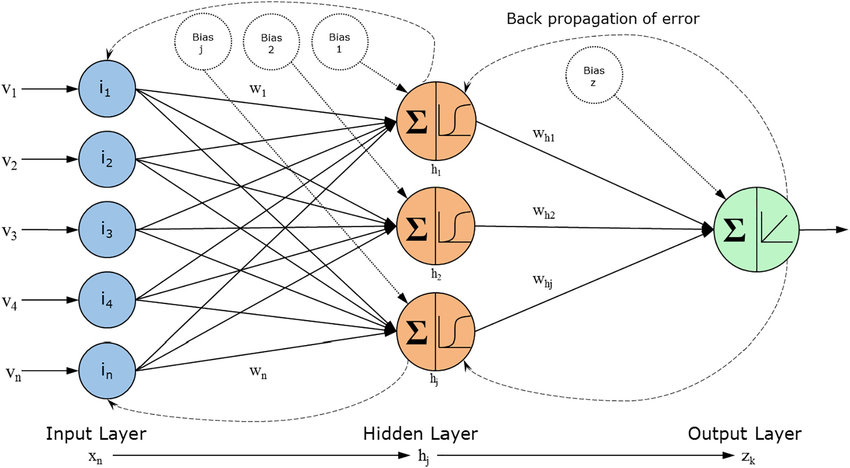

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.metrics import explained_variance_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve


import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
num_attribs = ["CNT_DRAWINGS_ATM_CURRENT_mean", "AMT_DRAWINGS_PCT_mean", "AMT_BALANCE_mean", "LTV_ratio_mean", "FLAG_WORK_PHONE", 
                   "AMT_PRINCIPAL_RECEIVABLE_PCT_mean", "DAYS_LAST_PHONE_CHANGE", "DAYS_ID_PUBLISH", "CNT_CHILDREN", "DAYS_REGISTRATION", 
                   "EXT_SOURCE_3", "EXT_SOURCE_2","EXT_SOURCE_1", "DAYS_EMPLOYED", "approved_credit_ratio_mean", "OWN_CAR_AGE", 
                   "AMT_ANNUITY_mean", "REG_CITY_NOT_WORK_CITY", "approved_count", "DEF_60_CNT_SOCIAL_CIRCLE", "FLAG_DOCUMENT_3", 
                   "AMT_REQ_CREDIT_BUREAU_YEAR", "REGION_POPULATION_RELATIVE", "TOTALAREA_MODE", "FLAG_DOCUMENT_6", "AMT_ANNUITY_min", 
                   "APARTMENTS_MEDI"]
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE']

selected_features = num_attribs + cat_attribs + ["SK_ID_CURR"]
# Create a class to select numerical or categorical columns since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


# Numerical Pipeline definition
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ]) 

In [65]:
def pct(x):
    return round(100*x,3)

In [66]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC",
                                   "Train F1 Score",
                                   "Test F1 Score",                                   
                                   "Train Log Loss",
                                   "Test Log Loss",
                                   "P Score",
                                   "Train Time",
                                   "Test Time",
                                   "Description"
                                  ])

In [67]:
train_dataset = pd.read_csv("/content/drive/My Drive/data/featured_data.csv")
X_kaggle_test = pd.read_csv("/content/drive/My Drive/data/kaggle_test.csv")


In [68]:
# Split Sample to feed the pipeline and it will result in a new dataset that is (1 / splits) the size 
splits = 5

# Train Test split percentage
subsample_rate = 0.4

X_train = train_dataset[selected_features]
y_train = train_dataset['TARGET']
X_kaggle_test = X_kaggle_test[selected_features]

## split part of data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train,
                                                    test_size=subsample_rate, random_state=42)

# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify=y_train,test_size=0.15, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")
print(f"X y_train         shape: {y_train.shape}")
# print(y_train.shape)

X train           shape: (37237, 34)
X test            shape: (24825, 34)
X X_kaggle_test   shape: (48744, 34)
X y_train         shape: (37237,)


In [69]:
import torch
import tensorflow as tf
import torch.nn as nn
import torch.nn.functional as func
import torch.optim as optim
from torch.utils.data import DataLoader

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss

import copy
from datetime import datetime
import pickle
import time
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as func
import torch.optim as optim
from torch.optim import lr_scheduler

# Metrics
from sklearn.metrics import auc

##Single layer Neural Network
####Data Preparation
Transform data using data pipeline and converted into Tensor for neural network pipeline.

In [70]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [71]:

full_X_train = data_prep_pipeline.fit_transform(X_train)
full_X_test = data_prep_pipeline.fit_transform(X_test)
full_X_kaggle_test = data_prep_pipeline.fit_transform(X_kaggle_test)

full_X_train_gpu = torch.FloatTensor(full_X_train).cuda()
full_X_test_gpu = torch.FloatTensor(full_X_test).cuda()
full_X_kaggle_test_gpu = torch.FloatTensor(full_X_kaggle_test).cuda()

y_train_gpu =  torch.FloatTensor(y_train.to_numpy()).cuda()
y_test_gpu = torch.FloatTensor(y_test.to_numpy()).cuda()

In [72]:
full_X_test_gpu.shape,full_X_train_gpu.shape,full_X_kaggle_test_gpu.shape

(torch.Size([24825, 58]), torch.Size([37237, 58]), torch.Size([48744, 58]))

In [11]:
full_X_train.shape,full_X_test.shape,full_X_kaggle_test.shape

((37237, 64), (24825, 64), (48744, 65))

####One layer : Linear and Sigmoid Activate Function
Sigmoid layer is used to create the probability of prediction.



In [12]:
%matplotlib inline

In [13]:
!pip install torch torchvision

In [73]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [74]:
dim_input = full_X_train_gpu.shape[1]
dim_hidden1 = 96
dim_hidden2 = 48
dim_output = 1
model1 = torch.nn.Sequential( 
    torch.nn.Linear(dim_input, dim_output),
    # torch.nn.ReLU(inplace=False),
    nn.Sigmoid())

In [240]:
input_layers = 64
output_layer = 2
hidden_layer1 = 96
hidden_layer2 =192

model2 = nn.Sequential()
model2.add_module("Linear",nn.Linear(input_layers,hidden_layer1))
model2.add_module("Relu",nn.ReLU(inplace=False))
model2.add_module("Linear_hh",nn.Linear(hidden_layer1,hidden_layer2))
model2.add_module("soft_max",nn.Softmax(dim=2))
model2.add_module("Linear_hh",nn.Linear(hidden_layer2,output_layer))

In [75]:
learning_rate = 0.01
optimizer = torch.optim.Adam(model1.parameters(), lr=learning_rate)
model1 = model1.cuda()


In [76]:
def return_report(y, y_prob):
  _, y_pred = torch.max(y_prob, dim = 1)
  y_pred = y_pred.cpu().numpy()
  acc = accuracy_score(y, y_pred)
  roc_auc = roc_auc_score(y, y_prob.cpu().detach().numpy())

  return_list = ([round(acc,4), round(roc_auc, 4)])

  return return_list

In [77]:
def print_report(y, y_prob, i):
  _, y_pred = torch.max(y_prob, dim = 1)
  y_pred = y_pred.cpu().numpy()
  acc = accuracy_score(y, y_pred)
  roc_auc = roc_auc_score(y, y_prob.cpu().detach().numpy())
  writer.add_scalar("roc_auc/train", roc_auc, i)
  writer.add_scalar("auc/train", acc, i)

  print(f'Accuracy : {round(acc,4)} ; ROC_AUC : {round(roc_auc, 4)}')

##Train Neural Network

In [78]:
epochs = 1000
y_train_gpu = y_train_gpu.reshape(-1, 1)
print('Train data : ')
model1.train()
for i in range(epochs):
  

  y_train_pred_prob = model1(full_X_train_gpu)

  loss = func.binary_cross_entropy(y_train_pred_prob, y_train_gpu)
  writer.add_scalar("Loss/train", loss, i+1)
  
  optimizer.zero_grad()
  #loss = loss_func(y_train_pred_prob, y_train_gpu)
  loss.backward()
  optimizer.step()

  if i % 50 == 49:
    print(f"Epoch {i + 1}:")
    print_report(y_train, y_train_pred_prob, i+1)

Train data : 
Epoch 50:
Accuracy : 0.6 ; ROC_AUC : 0.7457
Epoch 100:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 150:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 200:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 250:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 300:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 350:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 400:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 450:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 500:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 550:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 600:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 650:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 700:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 750:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 800:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 850:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 900:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 950:
Accuracy : 0.6 ; ROC_AUC : 0.7465
Epoch 1000:
Accuracy : 0.6 ; ROC_AUC : 0.7465


In [79]:
model1.eval()
y_test_gpu = y_test_gpu.reshape(-1, 1)
with torch.no_grad():
    y_test_pred_prob=model1(full_X_test_gpu)
    print('-' * 50)
    print('Test data : ')
    print_report(y_test, y_test_pred_prob, 0)
    print('-' * 50)

--------------------------------------------------
Test data : 
Accuracy : 0.6 ; ROC_AUC : 0.7409
--------------------------------------------------


In [32]:
%matplotlib inline

In [260]:
!pip install tensorboard

In [22]:
!tensorboard --logdir=runs


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.9.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [62]:
!tensorboard dev upload --logdir runs \
--name "My latest experiment" \
--description "Simple comparison of several hyperparameters"

Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/lKSYEjBUQhGRvUkPjyuAhg/

[2022-05-01T06:17:45] Started scanning logdir.
[2022-05-01T06:17:48] Total uploaded: 5087 scalars, 0 tensors, 0 binary objects
[2022-05-01T06:19:30] Total uploaded: 5124 scalars, 0 tensors, 0 binary objects


Interrupted. View your TensorBoard at https://tensorboard.dev/experiment/lKSYEjBUQhGRvUkPjyuAhg/
Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 312, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 258, in _run_main
    s

In [55]:
writer.flush()
writer.close()

In [90]:
nn_test_class_scores = model1(full_X_kaggle_test_gpu).cpu().data.numpy().reshape(1, -1)[0]


In [91]:
nn_submit_df = X_kaggle_test[['SK_ID_CURR']]
nn_submit_df['TARGET'] = nn_test_class_scores

In [92]:
nn_submit_df.to_csv("submission_nn.csv",index=False)